<a href="https://colab.research.google.com/github/Seguraaa10/TVFinal/blob/main/proyectobarkeley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfica de un nodo específico
4. Salir
Elige una opción: 1

=== Tiempos de los nodos ===
Nodo 0: 93.12 seg
Nodo 1: 95.62 seg
Nodo 2: 108.18 seg
Nodo 3: 94.17 seg
Nodo 4: 97.71 seg
Nodo 5: 103.74 seg
Nodo 6: 104.96 seg
Nodo 7: 106.69 seg

=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfica de un nodo específico
4. Salir
Elige una opción: 2

Maestro enviando su tiempo a los nodos esclavos...
Nodo 1 reporta desfase de +2.50 segundos
Nodo 2 reporta desfase de +15.06 segundos
Nodo 3 reporta desfase de +1.05 segundos
Nodo 4 reporta desfase de +4.59 segundos
Nodo 5 reporta desfase de +10.62 segundos
Nodo 6 reporta desfase de +11.84 segundos
Nodo 7 reporta desfase de +13.57 segundos

Promedio calculado: +7.40 segundos
Nodo 1 ajustado por +4.91 seg -> nuevo reloj: 100.52 seg
Nodo 2 ajustado por -7.65 seg -> nuevo reloj: 100.52 seg
Nodo 3 ajustado por +6.35 seg -> nuevo reloj: 100.52 seg


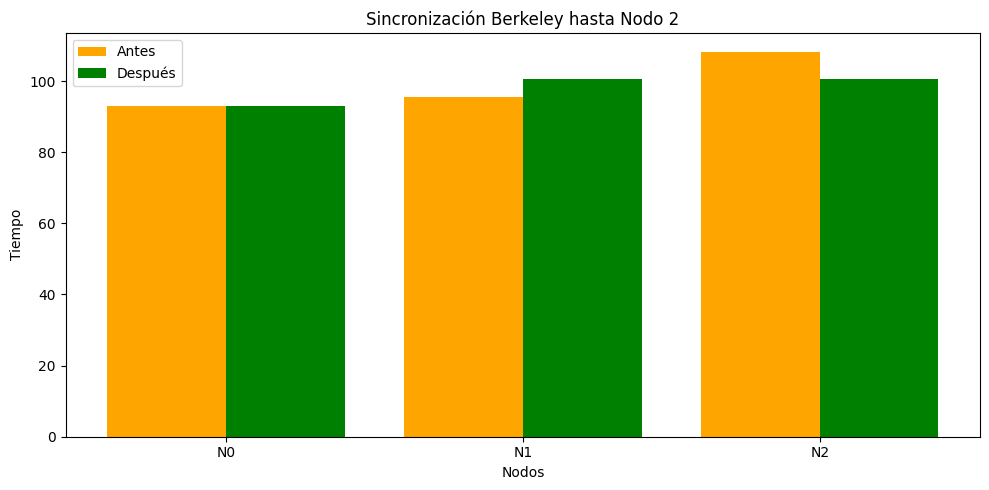


=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfica de un nodo específico
4. Salir
Elige una opción: 3
¿Hasta qué nodo quieres ver? (0 al 7): 4


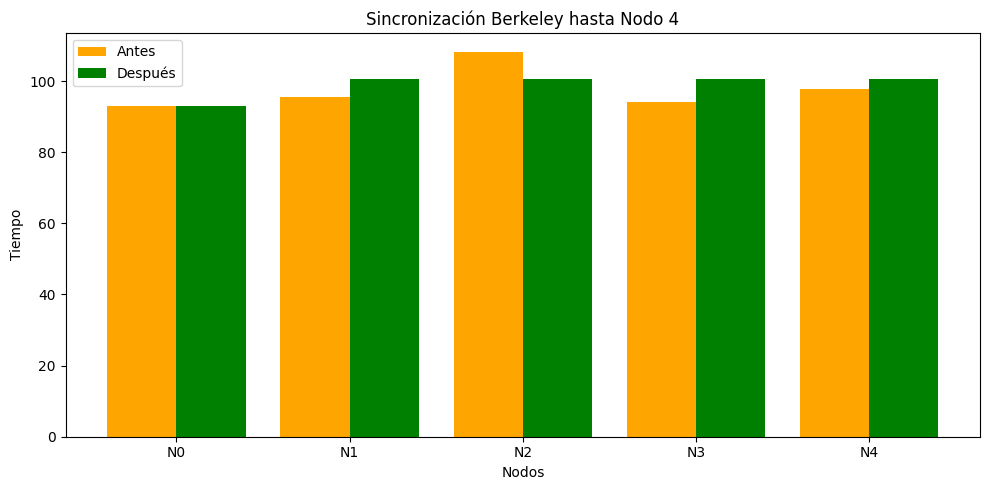


=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfica de un nodo específico
4. Salir
Elige una opción: 3
¿Hasta qué nodo quieres ver? (0 al 7): 2


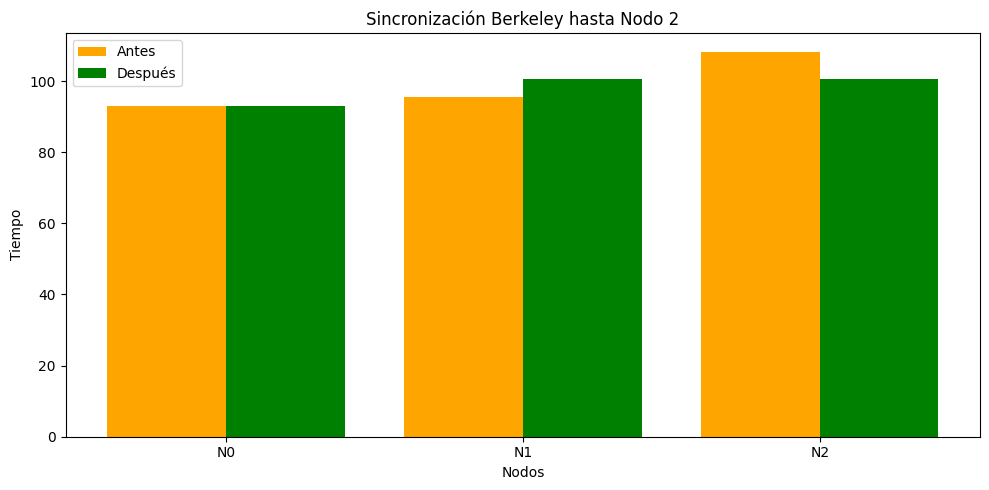


=== MENU BERKELEY ===
1. Ver relojes actuales
2. Sincronizar relojes
3. Ver gráfica de un nodo específico
4. Salir
Elige una opción: 4


In [1]:
import random
import matplotlib.pyplot as plt
import copy

class Nodo:
    def __init__(self, id, reloj):
        self.id = id
        self.reloj = reloj

    def ajustar_reloj(self, ajuste):
        self.reloj += ajuste

def mostrar_relojes(nodos, titulo="Tiempos de los nodos"):
    print(f"\n=== {titulo} ===")
    for nodo in nodos:
        print(f"Nodo {nodo.id}: {nodo.reloj:.2f} seg")

def sincronizar_berkeley(nodos):
    maestro = nodos[0]
    offsets = []

    print("\nMaestro enviando su tiempo a los nodos esclavos...")

    for nodo in nodos[1:]:
        offset = nodo.reloj - maestro.reloj
        print(f"Nodo {nodo.id} reporta desfase de {offset:+.2f} segundos")
        offsets.append(offset)

    promedio = sum(offsets + [0]) / len(nodos)
    print(f"\nPromedio calculado: {promedio:+.2f} segundos")

    for nodo in nodos[1:]:
        ajuste = promedio - (nodo.reloj - maestro.reloj)
        nodo.ajustar_reloj(ajuste)
        print(f"Nodo {nodo.id} ajustado por {ajuste:+.2f} seg -> nuevo reloj: {nodo.reloj:.2f} seg")

def graficar(nodos_antes, nodos_despues, hasta_nodo):
    # Filtrar los nodos hasta el que se pidió
    nodos_antes = nodos_antes[:hasta_nodo + 1]
    nodos_despues = nodos_despues[:hasta_nodo + 1]

    ids = [f"N{i}" for i in range(len(nodos_antes))]
    tiempos_antes = [n.reloj for n in nodos_antes]
    tiempos_despues = [n.reloj for n in nodos_despues]

    x = list(range(len(ids)))

    plt.figure(figsize=(10, 5))
    plt.bar([i - 0.2 for i in x], tiempos_antes, width=0.4, label="Antes", color="orange")
    plt.bar([i + 0.2 for i in x], tiempos_despues, width=0.4, label="Después", color="green")

    plt.xticks(x, ids)
    plt.xlabel("Nodos")
    plt.ylabel("Tiempo")
    plt.title(f"Sincronización Berkeley hasta Nodo {hasta_nodo}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Crear 8 nodos con tiempos aleatorios
nodos_originales = [Nodo(i, random.uniform(90, 110)) for i in range(8)]
nodos_antes = copy.deepcopy(nodos_originales)

while True:
    print("\n=== MENU BERKELEY ===")
    print("1. Ver relojes actuales")
    print("2. Sincronizar relojes")
    print("3. Ver gráfica de un nodo específico")
    print("4. Salir")
    opcion = input("Elige una opción: ")

    if opcion == "1":
        mostrar_relojes(nodos_originales)
    elif opcion == "2":
        sincronizar_berkeley(nodos_originales)
    elif opcion == "3":
        try:
            num = int(input("¿Hasta qué nodo quieres ver? (0 al 7): "))
            if 0 <= num <= 7:
                graficar(nodos_antes, nodos_originales, num)
            else:
                print("El número debe estar entre 0 y 7.")
        except ValueError:
            print("Ingresa un número válido.")
    elif opcion == "4":
        break
    else:
        print("Opción inválida. Intenta de nuevo.")
